In [1]:
import os
import sys
# block warnings from printing
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import collections
import xarray as xr
xr.set_options(keep_attrs=True)
import netCDF4 as nc
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import metpy.calc as mp
from metpy.units import units
from scipy.stats import ttest_ind, ttest_rel
from datetime import datetime

import cartopy
cartopy.config['data_dir'] = "/discover/nobackup/projects/jh_tutorials/JH_examples/JH_datafiles/Cartopy"
cartopy.config['pre_existing_data_dir'] = "/discover/nobackup/projects/jh_tutorials/JH_examples/JH_datafiles/Cartopy"
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely.geometry.polygon import LinearRing

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import cmocean.cm as cmo


# add path to custom functions
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/py_functions")
# import custom functions
from map_plot_tools import *
from colorbar_funcs import *


# settings
%config InlineBackend.figure_format = 'retina'


In [23]:
dpath0='/discover/nobackup/projects/giss/baldwin_nip/dmkumar'
latmin = -25
latmax = -5
lonmin = -100
lonmax = -60

ds = xr.open_dataset(f'{dpath0}/output/cpld.e2.1.3datm.output.nc').tb-273.15
ctrl = ds[0,2:5].sel(lat=slice(latmin,latmax), lon=slice(lonmin,lonmax)).mean(dim=['month','lat'])
casa = ds[2,2:5].sel(lat=slice(latmin,latmax), lon=slice(lonmin,lonmax)).mean(dim=['month','lat'])


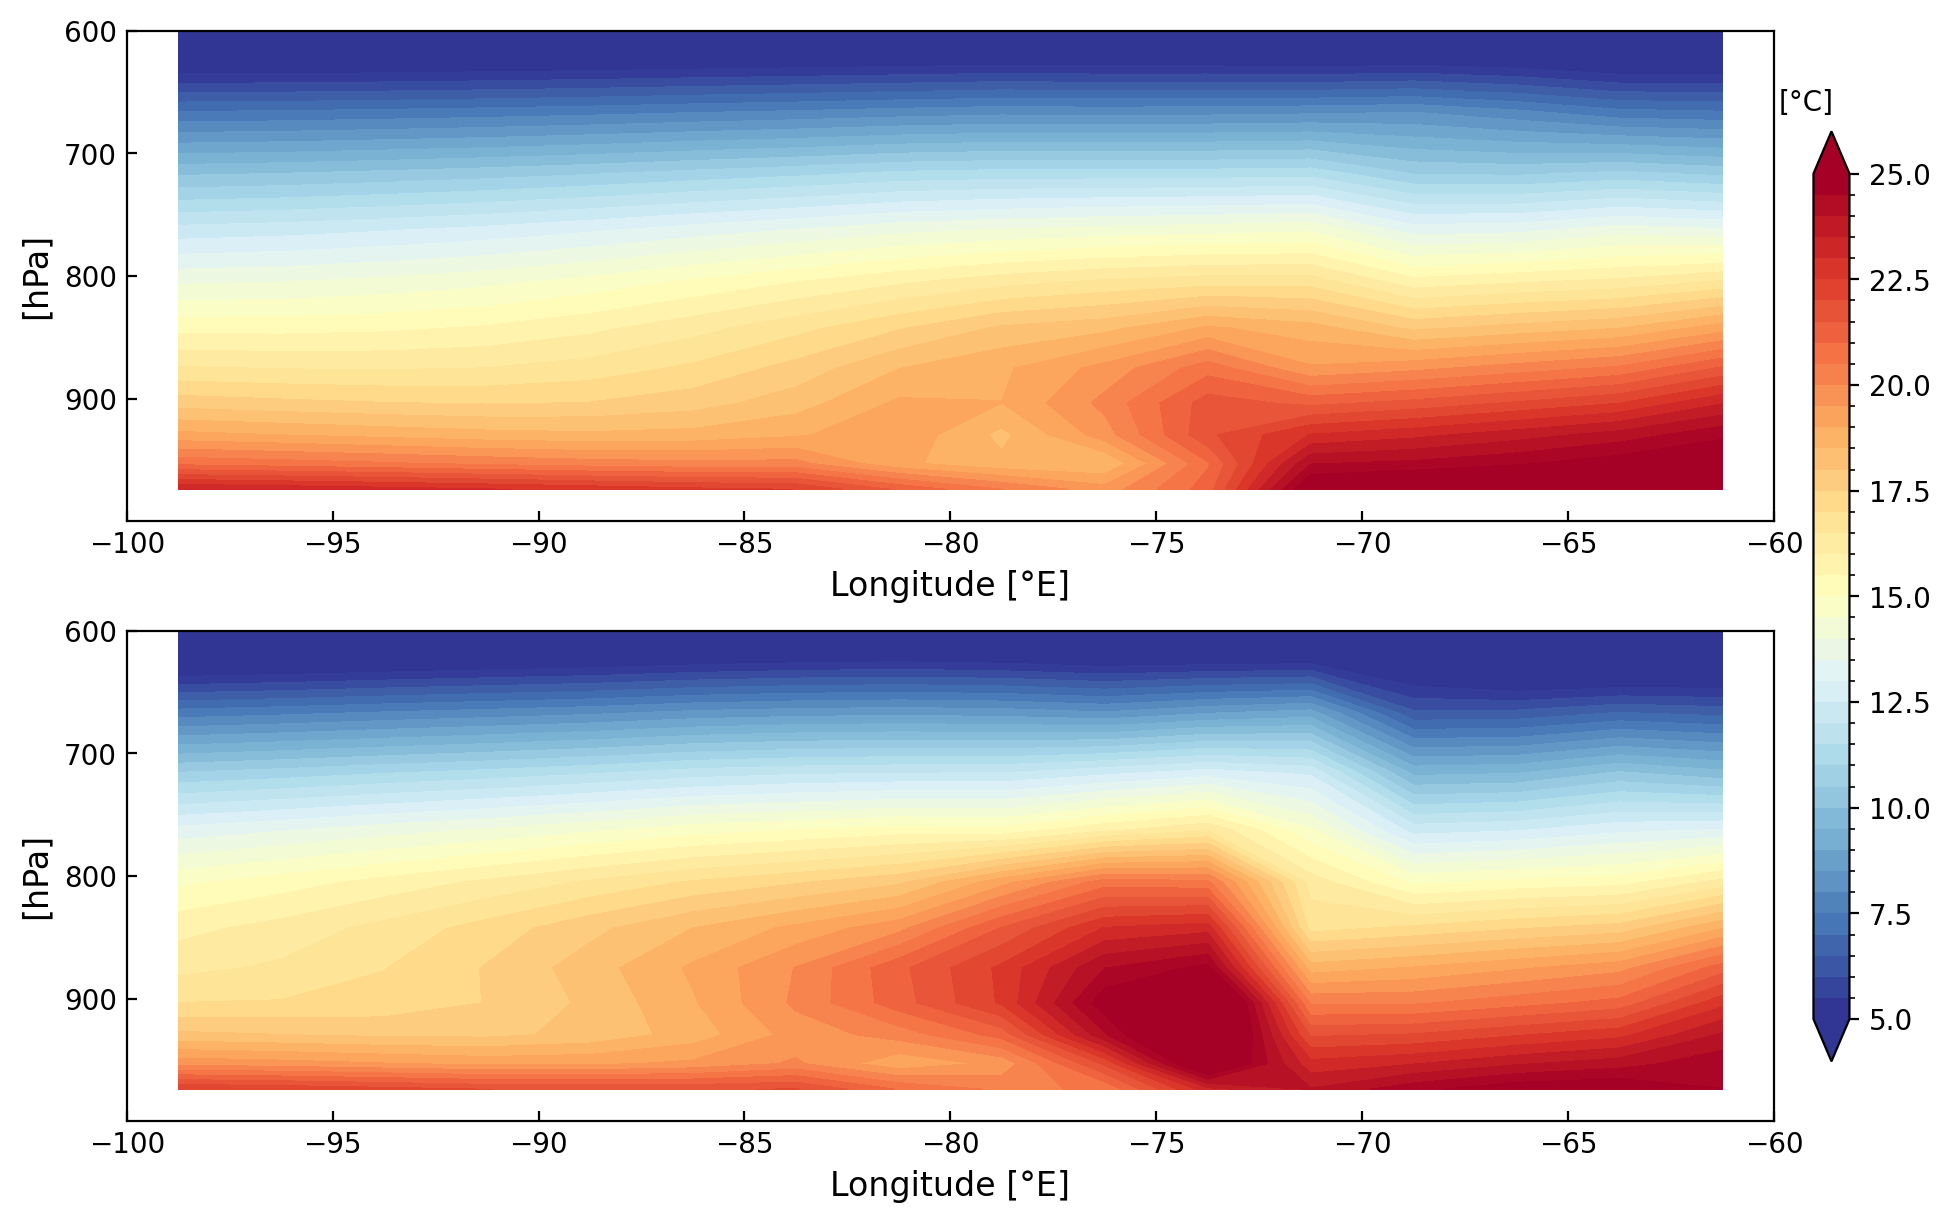

In [26]:
# -------------------- #
#       Settings       #
# -------------------- #
# info
level = ctrl.plm
lon = ctrl.lon
# plot specs
text_kw={'color':  'k', 'weight': 'bold', 'size': 12, 'horizontalalignment': 'left', 'verticalalignment': 'center'}
tkw = {'axis': 'both', 'direction':'in', 'labelsize': 10} 
xmin = lonmin
xmax = lonmax
# months to average over
season='ann'
mons=get_season(season)
# colormap
#cmap,_,_,_=get_settings(field='wind', diff=True)
cmap=cm.RdYlBu_r
vmin=5
vmax=25
levels=np.linspace(vmin, vmax, 41)
norm=mpl.colors.BoundaryNorm(levels, cmap.N)

fig,ax=plt.subplots(nrows=2, ncols=1, figsize=(9, 6), layout='constrained')


#ax.text(xmin,-30,'1$\sigma$-ENV[CAM+SAM]$-$CONTROL OMEGA (5°S$-$30°S)', **text_kw)
ax[0].contourf(lon, level, ctrl, cmap=cmap, levels=levels, extend='both')
ax[1].contourf(lon, level, casa, cmap=cmap, levels=levels, extend='both')


for i,ax in enumerate(ax):
    ax.set_xlabel('Longitude [°E]', weight='normal', size=12)
    ax.set(xlim=[xmin, xmax], ylim=[1000,600])
    ax.set_ylabel('[hPa]', weight='normal', size='large')
    ax.set_yticks([900,800,700,600])
    ax.tick_params(**tkw)
    
# add colorbar
cf=mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
cax=fig.add_axes([1.001, 0.125, 0.02, 0.775])
cbar=fig.colorbar(cf, orientation='vertical', extend='both', cax=cax)
cbar.set_label('[°C]', y=1.1, labelpad=-45, rotation=0, size=10, fontweight='normal', ha='center')
cbar.ax.tick_params(labelsize=10)
for tick in cbar.ax.yaxis.get_major_ticks():
    tick.label2.set_fontweight('normal')
    
#plt.savefig(f'{opath}/omega.zonal_profile.{season}.pdf', transparent=True, bbox_inches='tight')